<a href="https://colab.research.google.com/github/ShivinM-17/nlp-practices/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

### Loading the dataset

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-09-19 14:06:33--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.28MB/s    in 0.4s    

2023-09-19 14:06:34 (1.28 MB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Getting more info of the data, and changing it

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# checking the columns present in the dataset
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
# checking more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


So, we can see that all the columns are object types

In [8]:
# Checking the count unique values in each columns
df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

Since, v2 consists of the text data, it is obvious that it consists of different datas.
And for v1, it is the labels - spam / not spam

In [10]:
# Checking what kinds of data is present in the remaining columns
print(df['Unnamed: 2'].unique())
print(df['Unnamed: 3'].unique())
print(df['Unnamed: 4'].unique())

[nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t miss ur best life for anything... Gud nyt..."'
 ' just as a shop has to give a guarantee on what they sell. B. G."'
 ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"'
 ' the toughest is acting Happy with all unspoken pain inside..\\""'
 ' smoke hella weed\\""' '\\" not \\"what i need to do.\\""'
 'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV\\""'
 ' justthought iåÕd sayhey! how u doin?nearly the endof me wk offdam nevamind!We will have 2Hook up

It seems that these 3 columns may not help much in terms of predicting the results, therefore we will be dropping them

In [11]:
# dropping th unnecessary columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [12]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# renaming the data columns
df.columns = ['labels', 'data']

In [15]:
df

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [16]:
df['labels'].unique()

array(['ham', 'spam'], dtype=object)

<Axes: >

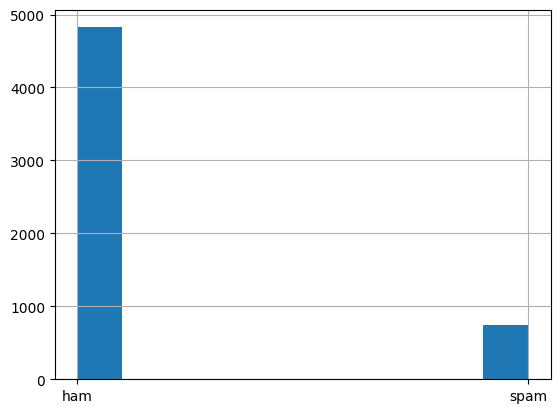

In [17]:
df['labels'].hist()

From the histogram, we can see that we have a case of unbalanced classes i.e. the count of 'ham' data is way more than 'spam' data, thus this may cause complications in our results

Thus, it makes sense, that we must look at the F1-score

In [18]:
# Create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].to_numpy()

In [20]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [22]:
Y

array([0, 0, 1, ..., 0, 0, 0])

### Train-test-split the data

In [23]:
# splitting up the data
df_train, df_test, y_train, y_test = train_test_split(df['data'], Y,
                                                      test_size=0.33,
                                                      random_state=42)

### Calculating features of the training and testing data, and making the model

In [24]:
# Tf-idf vectorizer
featurizer_1 = TfidfVectorizer(decode_error='ignore')
X_train_1 = featurizer_1.fit_transform(df_train)
X_test_1 = featurizer_1.fit_transform(df_test)

# Count vectorizer
featurizer_2 = CountVectorizer(decode_error='ignore')
X_train_2 = featurizer_2.fit_transform(df_train)
X_test_2 = featurizer_2.fit_transform(df_test)

### Checking out the featured vectors of the training and testing data

In [25]:
# Checking for the 1st feature vector data
X_train_1, X_test_1

(<3733x7057 sparse matrix of type '<class 'numpy.float64'>'
 	with 49296 stored elements in Compressed Sparse Row format>,
 <1839x4705 sparse matrix of type '<class 'numpy.float64'>'
 	with 24620 stored elements in Compressed Sparse Row format>)

In [26]:
# Checking for the 2nd feature vector data
X_train_2, X_test_2

(<3733x7057 sparse matrix of type '<class 'numpy.int64'>'
 	with 49296 stored elements in Compressed Sparse Row format>,
 <1839x4705 sparse matrix of type '<class 'numpy.int64'>'
 	with 24620 stored elements in Compressed Sparse Row format>)

### Training the model, and getting the results

In [27]:
model_1 = MultinomialNB()
model_2 = MultinomialNB()

#### Getting results using model 1 for Tf-idf vectored outputs

In [30]:
model_1.fit(X_train_1, y_train)
print(f"Train accuracy: {model_1.score(X_train_1, y_train)}")

model_1.fit(X_test_1, y_test)
print(f"Test accuracy: {model_1.score(X_test_1, y_test)}")

Train accuracy: 0.970800964371819
Test accuracy: 0.9603045133224578


#### Getting results using model 2 for CountVectorizer outputs

In [31]:
model_2.fit(X_train_2, y_train)
print(f"Train accuracy: {model_2.score(X_train_2, y_train)}")

model_2.fit(X_test_2, y_test)
print(f"Test accuracy: {model_2.score(X_test_2, y_test)}")

Train accuracy: 0.994910259844629
Test accuracy: 0.9934747145187602


### Getting accuracy results and other metrics for both the model

#### For model 1

In [36]:
# F1-scores for both training and test data
model_1.fit(X_train_1, y_train)
p_train_1 = model_1.predict(X_train_1)

model_1.fit(X_test_1, y_test)
p_test_1 = model_1.predict(X_test_1)
print(f"Train F1-score: {f1_score(y_train, p_train_1)}")
print(f"Test F1-score: {f1_score(y_test, p_test_1)}")

Train F1-score: 0.8762769580022701
Test F1-score: 0.8306264501160092


In [38]:
# AUC and ROC-scores for both training and test data
model_1.fit(X_train_1, y_train)
prob_train_1 = model_1.predict_proba(X_train_1)[:,1]

model_1.fit(X_test_1, y_test)
prob_test_1 = model_1.predict_proba(X_test_1)[:,1]
print(f"Train AUC: {roc_auc_score(y_train, prob_train_1)}")
print(f"Test AUC: {roc_auc_score(y_test, prob_test_1)}")

Train AUC: 0.9960194907693364
Test AUC: 0.9899855972634801


In [53]:
# Confusion matrix for train set
cm_train_1 = confusion_matrix(y_train, p_train_1)
cm_train_1

array([[3238,    0],
       [ 109,  386]])

In [54]:
# confusion matrix for test set
cm_test_1 = confusion_matrix(y_test, p_test_1)
cm_test_1

array([[1587,    0],
       [  73,  179]])

#### For model 2

In [42]:
# F1-scores for both training and test data
model_2.fit(X_train_2, y_train)
p_train_2 = model_2.predict(X_train_2)

model_2.fit(X_test_2, y_test)
p_test_2 = model_2.predict(X_test_2)
print(f"Train F1-score: {f1_score(y_train, p_train_2)}")
print(f"Test F1-score: {f1_score(y_test, p_test_2)}")

Train F1-score: 0.9807106598984772
Test F1-score: 0.9759036144578312


In [43]:
# AUC and ROC-scores for both training and test data
model_2.fit(X_train_2, y_train)
prob_train_2 = model_2.predict_proba(X_train_2)[:,1]

model_2.fit(X_test_2, y_test)
prob_test_2 = model_2.predict_proba(X_test_2)[:,1]
print(f"Train AUC: {roc_auc_score(y_train, prob_train_2)}")
print(f"Test AUC: {roc_auc_score(y_test, prob_test_2)}")

Train AUC: 0.9957699290620846
Test AUC: 0.9897180464288216


In [55]:
# Confusion matrix for train set
cm_train_2 = confusion_matrix(y_train, p_train_2)
cm_train_2

array([[3231,    7],
       [  12,  483]])

In [56]:
# confusion matrix for test set
cm_test_2 = confusion_matrix(y_test, p_test_2)
cm_test_2

array([[1584,    3],
       [   9,  243]])

### Plotting the confusion matrix

In [48]:
def plot_cm(cm):
  classes = ['ham','spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Target')

#### Model 1

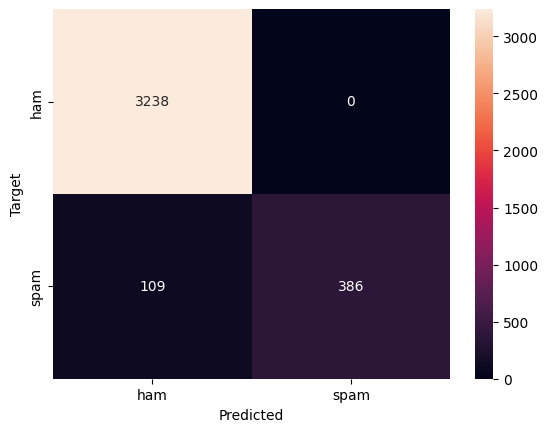

In [57]:
# plotting for model 1 - train set
plot_cm(cm_train_1)

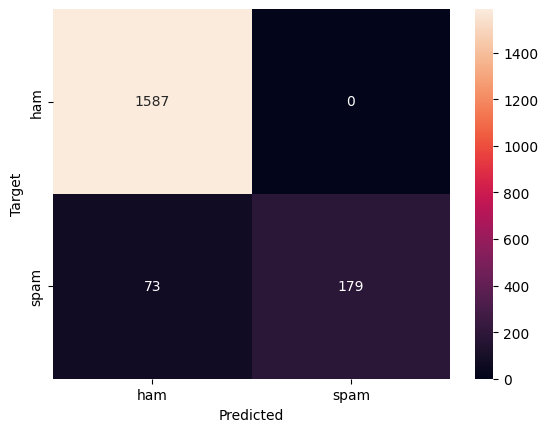

In [58]:
# plotting for model 1 - test set
plot_cm(cm_test_1)

#### Model 2

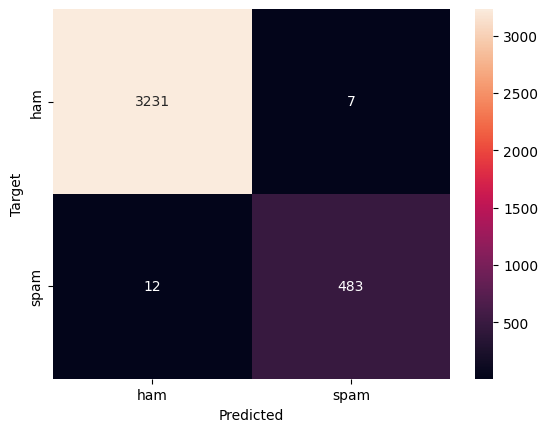

In [61]:
# plotting for model 2 - train set
plot_cm(cm_train_2)

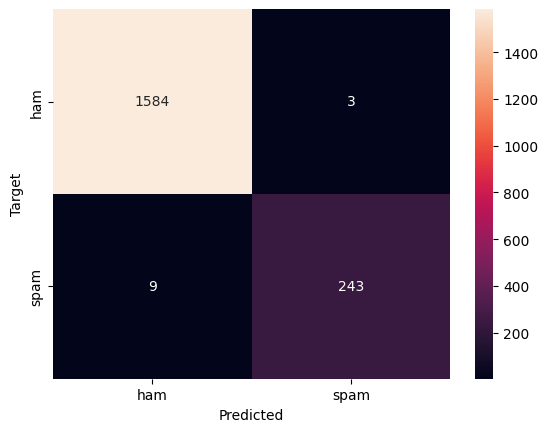

In [62]:
# plotting for model 2 - test set
plot_cm(cm_test_2)

### Creating a wordcloud to visualise the data

In [63]:
def visualise(label):
  words = ''
  for msg in df[df['labels']==label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

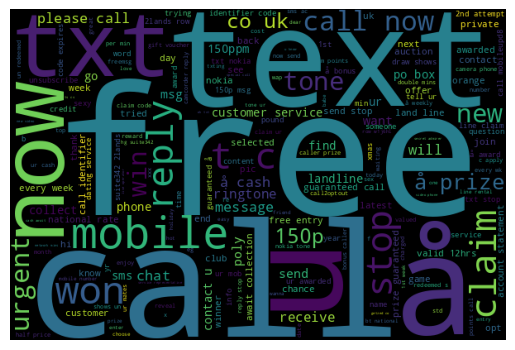

In [64]:
visualise('spam')

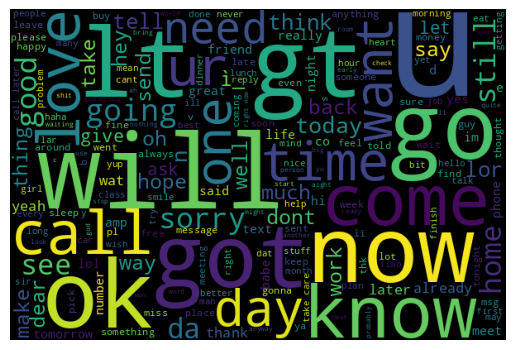

In [65]:
visualise('ham')